### Convolutional Neural Networks (CNNs)

In the previous notebook, we saw that a convolutional layer applies a number of convolutional filters to the input image:

![images](images/filters.png)

We can **stack several convolutional layers to progressively learn more complex features about objects** in the image:

* For example, the first layer might learn to detect edges (bottom in the diagram)
* The second layer might learn to detect combinations of edges (middle in the diagram)
* The final layer might learn to detect objects (top in the diagram)

![images](images/hierarchy.png)

For instance, a 4-layer CNN has learnt to recognize the following features in each layer:

![images](images/representations.png)


* Compare this to the last visualization you made in the previous notebook. The weights of the first layer are similar (detect basic edges), whereas in the third layer the weights have become more complex and are able to detect more complex features, such as eyes and faces.

### CNN Architecture

A typical CNN architecture consists of three main types of layers:

* **Convolutional layers**: using `nn.Conv2d` in PyTorch. Those are the equivalent of linear layers for image data/computer vision tasks.
* **Pooling layers**: using `nn.MaxPool2d` in PyTorch. Those layers act as non-linear activation functions for the convolutional layers. The most common is the Max Pooling, which takes the maximum value of a given window size, though we can also do Average Pooling:
![images](images/pooling.png)
* **Linear layers**: at the end of the network, to classify the images. Those are the same as in a regular neural network: `nn.Linear` in PyTorch.

### List of popular CNN architectures

Though we can build our own CNN architecture from scratch, for applications we typically use some pre-defined CNN architectures, as they have been found to work well empirically. 

Some of the popular CNN architectures are the following (in chronological order):

#### LeNet

- The standard ‘template’: stacking convolutions with activation functions, and ending the network with one or more fully-connected layers.

- This architecture has about **60,000 parameters.**

- It was used for digit recognition in checks in banks initially.

![images](images/lenet1.png)
![images](images/lenet2.png)

#### AlexNet

- This architecture has about **60 million parameters.**
- AlexNet just stacked a few more layers onto LeNet, and used ReLU as the activation function.
- First network to be trained on GPUs.

![images](images/alexnet.png)

#### VGG-16

- Designing of deeper networks (roughly twice as deep as AlexNet)
- This architecture has about **138 million parameters.**

![images](images/vgg.png)

#### Inception (aka GoogleNet): a CNN with more CNNs inside.

- Building networks using modules/blocks. Instead of stacking convolutional layers, we stack modules or blocks, within which are convolutional layers. Hence the name Inception

![images](images/inception.png)

#### EfficientNets

- One of today's most useful architectures, as it is very efficient in terms of parameters and computation.
- Several versions of EfficientNets, depending on the number of parameters.
- https://blog.research.google/2019/05/efficientnet-improving-accuracy-and.html

![images](images/efficientnet.png)

### Measuring progress in Computer Vision tasks

The ImageNet competition is the most famous competition in the field of computer vision. It is a competition where the goal is to **classify images into one of 1000 classes**. The competition has been running since 2010, and has been a major driver of progress in the field (the previous architectures were all finalists of the ImageNet competition).

> On 30 September 2012, a convolutional neural network (CNN) called AlexNet achieved an accuracy of 85% in the ImageNet 2012 Challenge, more than 11 percentage points higher than that of the runner up. Using convolutional neural networks was feasible due to the use of graphics processing units (GPUs) during training, an essential ingredient of the deep learning revolution. According to The Economist, "Suddenly people started to pay attention, not just within the AI community but across the technology industry as a whole."


https://www.economist.com/special-report/2016/06/23/from-not-working-to-neural-networking

### Using a pre-trained CNN in pytorch

Fortunately, we don't have to train a CNN from scratch. We can use a pre-trained CNN, with the architecture already built in Pytorch.

https://pytorch.org/vision/stable/models.html

In [13]:
from torchvision.models import list_models, get_model
import torchvision

# List available models
classification_models = list_models(module=torchvision.models)

# Print the list of available models
print(classification_models)


['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [14]:
model = get_model("alexnet")

In [15]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [16]:
model = get_model("inception_v3")

/Users/victorgallego/miniforge3/lib/python3.9/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [17]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Which architecture to use for my task?

This table is a good starting point to decide which architecture to use for your task:

* Notice the Acc@1 column (accuracy), and the Params column (number of parameters). The number of parameters is a good proxy for the computational cost of the model: bigger count implies more time to predict an image, and more memory to store the model.

https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights

![images](images/table.png)

A general rule of thumb is the following:

* Start with a medium-sized model (e.g. EfficientNet-B3), and compute accuracy and inference time over a subset of your particular dataset.
* If the accuracy is not good enough, try a bigger model (e.g. EfficientNet-B4 or B5).
* If the inference time is too slow, try a smaller model (e.g. EfficientNet-B2 or B1).

As you can see, there is a **trade-off between accuracy and inference time**, and you should choose the model that best fits your particular needs.

In [26]:
from torchvision.io import read_image
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights

# Step 1: Initialize model with the best available weights
weights = EfficientNet_B2_Weights.DEFAULT
model = efficientnet_b2(weights=weights)
model.eval()  # disables gradient calculation for inference.

# Step 2: Initialize the preprocess function
preprocess = weights.transforms()

def classify_image(img, model, preprocess):
    # Step 3: Apply inference preprocessing transforms
    batch = preprocess(img).unsqueeze(0)

    # Step 4: Use the model and print the predicted category
    prediction = model(batch).squeeze(0).softmax(0)
    class_id = prediction.argmax().item()
    score = prediction[class_id].item()
    category_name = weights.meta["categories"][class_id]
    return f"{category_name}: {100 * score:.1f}%"

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /Users/victorgallego/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:02<00:00, 16.2MB/s]


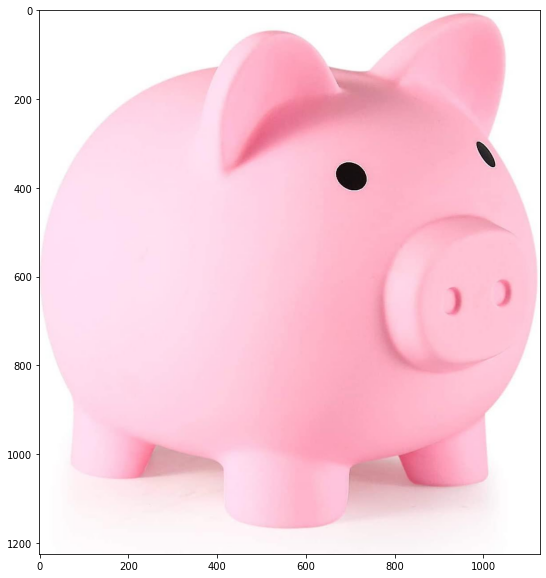

In [27]:
img = read_image("images/bank.png")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))

In [28]:
classify_image(img, model, preprocess)

'piggy bank: 60.2%'

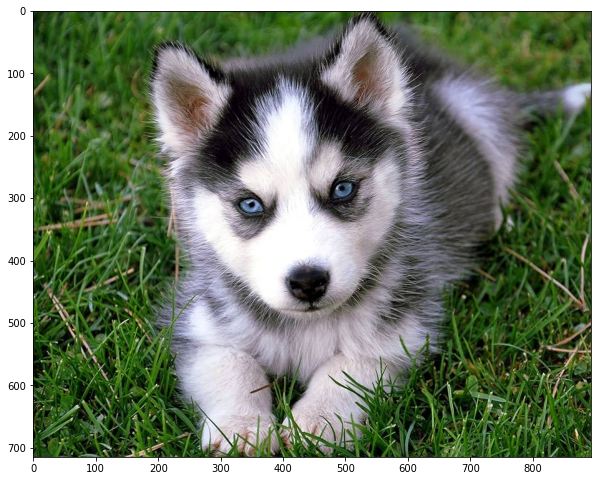

In [29]:
img = read_image("images/husky.png")

plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))

In [30]:
classify_image(img, model, preprocess)

'Eskimo dog: 43.7%'

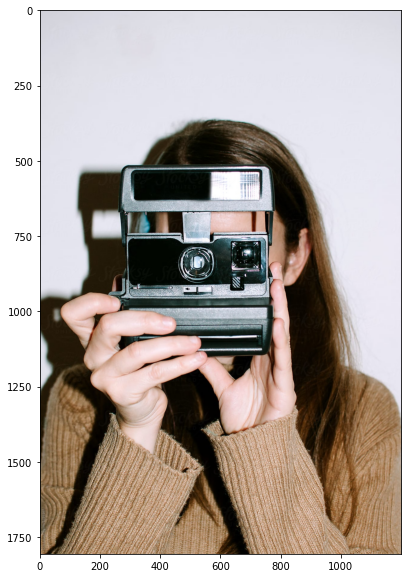

In [31]:
img = read_image("images/polaroid.png")

plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))

In [32]:
classify_image(img, model, preprocess)

'Polaroid camera: 87.4%'

**Exercise** Compute the inference time for processing an image for each model within the family of EfficientNets, using the same image.

Are the predictions always the same?

In [25]:
import time

tic = time.time()
classify_image(img, model, preprocess)
toc = time.time()

print("Total time", toc - tic)

Total time 2.13635516166687


With Efficient B3.

In [33]:
import time

tic = time.time()
classify_image(img, model, preprocess)
toc = time.time()

print("Total time", toc - tic)

Total time 0.43416690826416016


### Next steps

* While these pretrained CNNs work very well, remember they have been trained over the Imagenet dataset, which "only" has 1000 different classes.

* If you need to classify images into a different set of classes, we will see how to adapt the previous models to solve the task.